## Proto Type 1. 모델링 정확도 올리기 

#### 1.문제점
 1-1.데이터 분류 후 5개의 컬럼만을 이용 하여 학습 시켰을 시 테스트 정확도 하락

### 2.실험 내용
 2-1. 데이터 분류를 9개로 늘린 후 다층 퍼셉트론 모델로 진행
 2-2. 데이터 분류로 안되는 경우 이미지 보강을 통하여 다층 퍼셍트론으로 진행
 2-3. 위 결과에 따라 데이터 문제인지 모델의 문제인지 파악 하기
 

In [1]:
#라이브러리 가져오기
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [2]:
#센달을 제외한 데이터 분류 하기
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# sorting based on index
idx = np.argsort(train_labels)
train_images = train_images[idx]
train_labels = train_labels[idx]

idx = np.argsort(test_labels)
test_images = test_images[idx]
test_labels = test_labels[idx]

labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label_mapping = dict(zip(labels, range(10)))

def get_data(mapping, classes):
    # X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])
    X_train, X_test, y_train, y_test = [],[],[],[]
    for cls in classes:
        idx = mapping[cls]
        start = idx*6000
        end = idx*6000+6000
        X_train.append(train_images[start: end])
        # X_train = np.append(X_train, train_images[start: end])
        y_train.append(train_labels[start: end])
        # y_train = np.append(X_train, train_labels[start: end])
        start = idx*1000
        end = idx*1000+1000
        X_test.append(test_images[start: end])
        # X_test = np.append(X_test, test_images[start: end])
        y_test.append(test_labels[start: end])
        # y_test = np.append(y_test, test_labels[start: end])
    return X_train, X_test, y_train, y_test


train_X, test_X, train_Y, test_Y = get_data(label_mapping, 
                                            classes=["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Shirt", "Sneaker", "Bag", "Ankle boot"])

4423680/4422102 [==============================] - 0s 0us/step


In [20]:
# test_Y each array -->sum 1array 
empty_array1 = np.array([])
# print(type(d))
for arr in test_Y:
    # print(type(arr))
    empty_array1 = np.append(empty_array1,arr)
test_Y = empty_array1

# train_Y 5개의 어레이를 1개의 어레이로 만들기
empty_array2 = np.array([])

for arr in train_Y:
    empty_array2 = np.append(empty_array2, arr)
train_Y = empty_array2

train_Y.shape, test_Y.shape

NameError: ignored

In [4]:
# test_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정.
for idx, img in enumerate(test_X):
    if idx == 0 :
        test_img0 = img
    elif idx == 1:
        test_img1 = img
    elif idx == 2:
        test_img2 = img
    elif idx == 3:
        test_img3 = img
    elif idx == 4:
        test_img4 = img
    elif idx == 5:
        test_img5 = img
    elif idx == 6:
        test_img6 = img
    elif idx == 7:
        test_img7 = img
    else:
        test_img8 = img
print(test_img0.shape, test_img1.shape, test_img2.shape, test_img3.shape, test_img4.shape, test_img5.shape, test_img6.shape, test_img7.shape, test_img8.shape)

# train_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정
for idx, img in enumerate(train_X):
    if idx == 0 :
        train_img0 = img
    elif idx == 1:
        train_img1 = img
    elif idx == 2:
        train_img2 = img
    elif idx == 3:
        train_img3 = img
    elif idx == 4:
        train_img4 = img
    elif idx == 5:
        train_img5 = img
    elif idx == 6:
        train_img6 = img
    elif idx == 7:
        train_img7 = img
    else:
        train_img8 = img
print(train_img0.shape, train_img1.shape, train_img2.shape, train_img3.shape, train_img4.shape, train_img5.shape, train_img6.shape, train_img7.shape, train_img8.shape)


(1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28)
(6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28)


In [5]:
# test_X 하나로 합쳐주는 과정 1번만 진행 해야 합니다.
test_img0 = np.vstack((test_img0, test_img1))
test_img0 = np.vstack((test_img0, test_img2))
test_img0 = np.vstack((test_img0, test_img3))
test_img0 = np.vstack((test_img0, test_img4))
test_img0 = np.vstack((test_img0, test_img5))
test_img0 = np.vstack((test_img0, test_img6))
test_img0 = np.vstack((test_img0, test_img7))
test_X = np.vstack((test_img0, test_img8))

# train_X 하나로 합쳐주는 과정
train_img0 = np.vstack((train_img0, train_img1))
train_img0 = np.vstack((train_img0, train_img2))
train_img0 = np.vstack((train_img0, train_img3))
train_img0 = np.vstack((train_img0, train_img4))
train_img0 = np.vstack((train_img0, train_img5))
train_img0 = np.vstack((train_img0, train_img6))
train_img0 = np.vstack((train_img0, train_img7))
train_X = np.vstack((train_img0, train_img8))

print(train_X.shape, test_X.shape)

(54000, 28, 28) (9000, 28, 28)


In [6]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((54000, 28, 28), (9000, 28, 28), (54000,), (9000,))

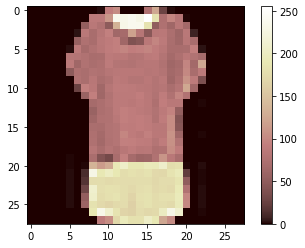

In [7]:
plt.imshow(train_X[2], cmap='pink')
plt.colorbar()
plt.show()
# print('정답범주', train_Y[2])

In [8]:
#min-max-regulation 최소 최대값 데이터 평준화
train_X = train_X / 255.0
test_X = test_X / 255.0
# print(train_X[2])

In [9]:
# 다층 퍼셉트론 모델로 훈련
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=9, activation='softmax')
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1161      
Total params: 101,641
Trainable params: 101,641
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(train_X, train_Y, epochs=500, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=500, monitor='val_loss')])

Epoch 1/500
1266/1266 [==============================] - 4s 3ms/step - loss: 0.3044 - accuracy: 0.8842 - val_loss: nan - val_accuracy: 0.1110
Epoch 2/500
1266/1266 [==============================] - 4s 3ms/step - loss: 0.2975 - accuracy: 0.8881 - val_loss: nan - val_accuracy: 0.1110
Epoch 3/500
1266/1266 [==============================] - 4s 3ms/step - loss: 0.2893 - accuracy: 0.8899 - val_loss: nan - val_accuracy: 0.1110
Epoch 4/500
1266/1266 [==============================] - 3s 3ms/step - loss: 0.2810 - accuracy: 0.8946 - val_loss: nan - val_accuracy: 0.1110
Epoch 5/500
1266/1266 [==============================] - 3s 2ms/step - loss: 0.2724 - accuracy: 0.8969 - val_loss: nan - val_accuracy: 0.1110
Epoch 6/500
1266/1266 [==============================] - 3s 2ms/step - loss: 0.2678 - accuracy: 0.8988 - val_loss: nan - val_accuracy: 0.1110
Epoch 7/500
1266/1266 [==============================] - 3s 3ms/step - loss: 0.2612 - accuracy: 0.9013 - val_loss: nan - val_accuracy: 0.1110
Epoch 

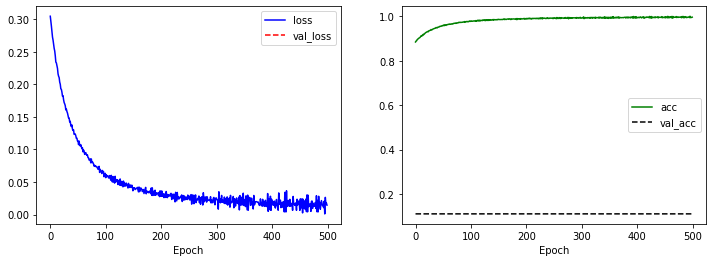

In [21]:
#모델 학습 후 로스값과 정확도의 이미지 처리
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [22]:
#최 종 적확도 확인 
model.evaluate(test_X,test_Y)

282/282 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6667


[nan, 0.6666666865348816]

(660, 500, 3)
########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


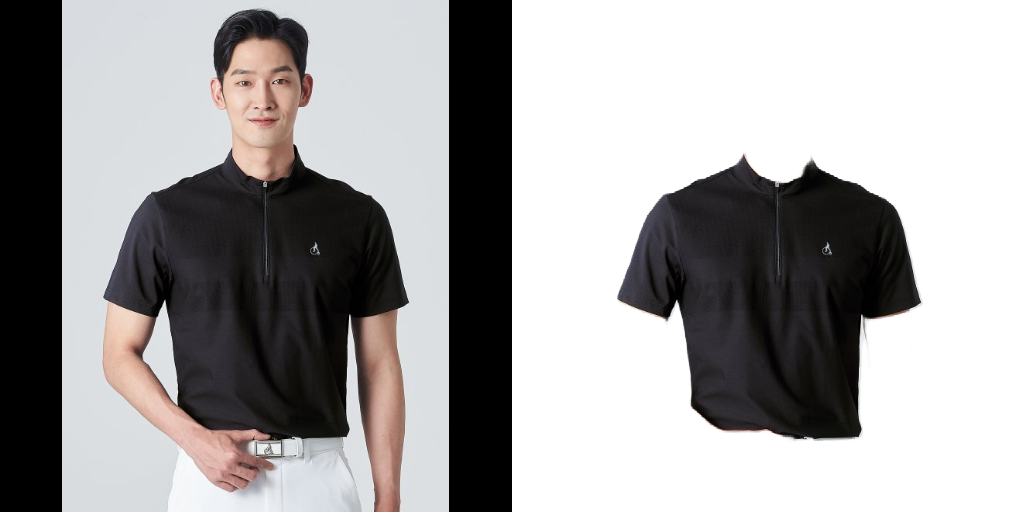

In [23]:
#기존 우리의 openCV를 통해 의류를 분류해 내기

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/drive/My Drive/test_1/test_2.jpg'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/fAIshion_P/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb ----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        print(file.shape)

        # b,g,r= cv2.split(file)
        # file = cv2.merge([b,g,r])

        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)
cv2_imshow(image)
# print(image.shape)

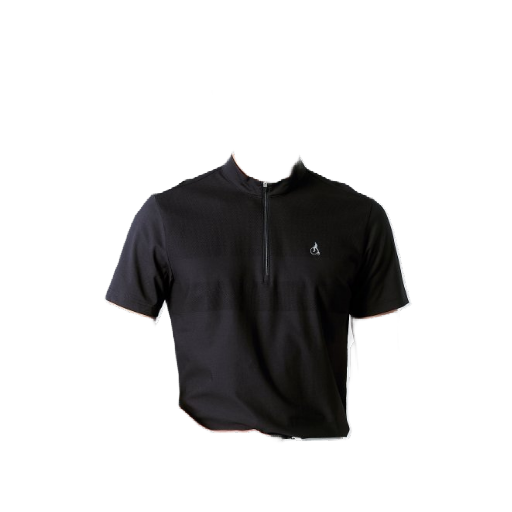

In [24]:
# 이미지 자르고, 투명값 검정배경 입혀주기.

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
# cv2_imshow(image_crop)

for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

cv2_imshow(image_crop)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 36 51 18  0  0 12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 38 32 27 28 41 39 12 16 20 19 30  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 55 30 32 35 31 29

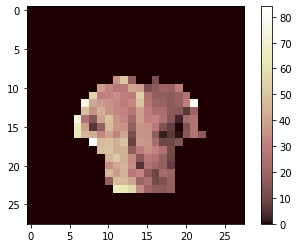

(1, 28, 28)

In [25]:
# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))
cv2_imshow(image_resize)

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)
print(image_gray)

# 조금 더 크게 시각화..
plt.imshow(image_gray, cmap='pink')
plt.colorbar()
plt.show()

# 정규화 해준다.
input_image = image_gray/255.0

# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28))
input_image.shape

In [ ]:
# 기존 데이터 예측 범주
# 0 : 티셔츠 / 상의
# 1 : 바지
# 2 : 스웨터
# 3 : 드레스
# 4 : 코트
# 5 : 샌들
# 6 : 셔츠
# 7 : 운동화
# 8 : 가방
# 9 : 부츠


# 수정한 데이터 범주 순서
# ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Shirt", "Sneaker", "Bag", "Ankle boot"]

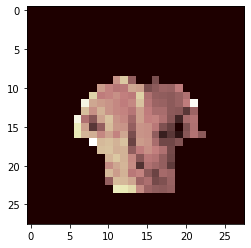

[[1.0045583 1.0001397 1.00001   1.9880502 1.0070822 1.0000068 1.0001462 1.        1.0000066]]


In [26]:
#예측 수행
input_predict = model.predict(input_image)+1
#예측 이미지 확인 
plt.imshow(input_image.reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인 
print(input_predict)

In [27]:
max_value = np.max(input_predict)
# print(max_value)
max_idx = np.where(input_predict == max_value)
# print(max_idx)
# print(max_idx[1][0])
predict_idx = max_idx[1][0]
predict_idx

3